Programming for Data Science: Final Project 
Name: Letizia 
Surname: Lanza 
ID: VR502321

PART 1: Data Exploration and Data Wrangling 

1. Explore the dataset: your first task is to explore the data as seen in class, finding correlations between attributes and finding some interesting aspects that justify the next parts of the analysis. 

The chosen dataset is available at the following Kaggle's link: https://www.kaggle.com/datasets/sogun3/uspollution 
The dataset is about pollution in the U.S. that has been well documented by the U.S. EPA. 
In particular, this dataset deal with the four major pollutants, which are Nitrogen Dioxide (NO2), Sulphur Dioxide (SO2), Carbon Monoxide (CO) and Ozone (O3), for every day between 2000 and 2016.

The first thing to succesfully carry out this and the following exercises, is to import some libraries as we have seen during the lessons such as: 

In [1]:
import os 
import numpy as np 
import pandas as pd 

The aim of the following command is being able to read data from a CSV file and load it into a Pandas DataFrame.

In [2]:
pollution_df = pd.read_csv('pollution_us_2000_2016.csv')
pollution_df

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.200,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.200,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.200,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,Parts per billion,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN


As it can be seen the dataset has 1.746.661 rows and 29 columns. 

The following DataFrame.drop() function is used to remove rows or columns that are not useful in the DataFrame. 

In [3]:
pollution_df = pollution_df.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'], axis = 1)
pollution_df

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.200,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.200,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.200,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.200,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,NaN,0.091667,0.100,2,1.0
1746657,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.067714,0.127,0,NaN
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.100000,0.100,0,1.0
1746659,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.067714,0.127,0,NaN


The number of columns decreased from 29 to 20 as it is required to delete Unnamed: 0 column, State Code column, County Code column, Site Num column, Address column, NO2 Units column, O3 Units column, SO2 Units column and CO Units column.

The DataFrame.info() function prints information about the DataFrame such as number of columns, column labels, column data types, memory usage, range index and the number of cells in each column (non-null values): 

In [4]:
pollution_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   State              1746661 non-null  object 
 1   County             1746661 non-null  object 
 2   City               1746661 non-null  object 
 3   Date Local         1746661 non-null  object 
 4   NO2 Mean           1746661 non-null  float64
 5   NO2 1st Max Value  1746661 non-null  float64
 6   NO2 1st Max Hour   1746661 non-null  int64  
 7   NO2 AQI            1746661 non-null  int64  
 8   O3 Mean            1746661 non-null  float64
 9   O3 1st Max Value   1746661 non-null  float64
 10  O3 1st Max Hour    1746661 non-null  int64  
 11  O3 AQI             1746661 non-null  int64  
 12  SO2 Mean           1746661 non-null  float64
 13  SO2 1st Max Value  1746661 non-null  float64
 14  SO2 1st Max Hour   1746661 non-null  int64  
 15  SO2 AQI            873754 non-nu

As it can be seen there are 20 column with a RangeIndex (rows) for a total of 1.746.661. Moreover, the Non-Null Count column returns the number of non-null values in the relative column of the DataFrame.
There are also 3 types of data type such as object (generic data), float (real numbers that can have a fractional part) and int (real whole numbers without a fractional part).
Another information that can be read is the memory usage of 266.5+ MB. 

The DataFrame.describe() function gives descriptive information about the dataset as it can be seen below: 

In [5]:
pollution_df.describe()

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


Glossary: 
- count: the number of non - null values in each column 
- mean: the mean (average) value of each numerical column 
- sdt: the standard deviation of each numerical column 
- min: the minimum value in each numerical column 
- 25%: the value at the 25th percentile (first quartile) of each numerical column 
- 50%: the value at the 50th percentile (median or second quartile) of each numerical column 
- 75%: the value at the 75th percentile (third quartile) of each numerical column
- max: the maximum value in each numerical column 

The DataFrame.describe().T function is used to transpose index and columns of the data frame as follow: 

In [6]:
pollution_df.describe().T

,count,mean,std,min,25%,50%,75%,max
NO2 Mean,1746661.0,12.821930,9.504814,-2.0000,5.750000,10.739130,17.713636,139.541667
NO2 1st Max Value,1746661.0,25.414848,15.999630,-2.0000,13.000000,24.000000,35.700000,267.000000
NO2 1st Max Hour,1746661.0,11.731023,7.877501,0.0000,5.000000,9.000000,20.000000,23.000000
NO2 AQI,1746661.0,23.898217,15.162805,0.0000,12.000000,23.000000,33.000000,132.000000
O3 Mean,1746661.0,0.026125,0.011370,0.0000,0.017875,0.025875,0.033917,0.095083
O3 1st Max Value,1746661.0,0.039203,0.015344,0.0000,0.029000,0.038000,0.048000,0.141000
O3 1st Max Hour,1746661.0,10.170529,4.003144,0.0000,9.000000,10.000000,11.000000,23.000000
O3 AQI,1746661.0,36.050121,19.780423,0.0000,25.000000,33.000000,42.000000,218.000000
SO2 Mean,1746661.0,1.870364,2.760435,-2.0000,0.256522,0.987500,2.325000,321.625000
SO2 1st Max Value,1746661.0,4.492185,7.679866,-2.0000,0.800000,2.000000,5.000000,351.000000


The DataFrame.head() function displays the first 5 rows of the DataFrame by default as below: 

In [7]:
pollution_df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


The DataFrame.tail() function returns the last 5 rows of the dataframe by default as can be seen: 

In [8]:
pollution_df.tail()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,NaN,0.091667,0.100,2,1.0
1746657,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.067714,0.127,0,NaN
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.100000,0.100,0,1.0
1746659,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.067714,0.127,0,NaN
1746660,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.100000,0.100,0,1.0


The DataFrame.columns function is an attribute that provides access to the column labels of a DataFrame: 

In [9]:
pollution_df.columns

Index(['State', 'County', 'City', 'Date Local', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

The DataFrame.max() function is used to find the maximum value in the DataFrame: 

In [10]:
pollution_df.max()

State                   Wyoming
County                     York
City                       York
Date Local           2016-05-31
NO2 Mean             139.541667
NO2 1st Max Value         267.0
NO2 1st Max Hour             23
NO2 AQI                     132
O3 Mean                0.095083
O3 1st Max Value          0.141
O3 1st Max Hour              23
O3 AQI                      218
SO2 Mean                321.625
SO2 1st Max Value         351.0
SO2 1st Max Hour             23
SO2 AQI                   200.0
CO Mean                7.508333
CO 1st Max Value           19.9
CO 1st Max Hour              23
CO AQI                    201.0
dtype: object

The DataFrame.min() function is used to find the minimum value in the DataFrame: 

In [11]:
pollution_df.min()

State                    Alabama
County                       Ada
City                 Albuquerque
Date Local            2000-01-01
NO2 Mean                    -2.0
NO2 1st Max Value           -2.0
NO2 1st Max Hour               0
NO2 AQI                        0
O3 Mean                      0.0
O3 1st Max Value             0.0
O3 1st Max Hour                0
O3 AQI                         0
SO2 Mean                    -2.0
SO2 1st Max Value           -2.0
SO2 1st Max Hour               0
SO2 AQI                      0.0
CO Mean                  -0.4375
CO 1st Max Value            -0.4
CO 1st Max Hour                0
CO AQI                       0.0
dtype: object

2. Clean up the dataset: this step encompasses the replacement of null values with appropriate data or their outright removal. During this step you are encouraged to modify the data according to the consideration matured during the exploration.

For checking if there are some null values the DataFrame.isnull() function can be used: 

In [12]:
pollution_df.isnull()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1746657,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1746658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1746659,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True


As it can be seen, some columns present the "True" word that highlight a null value in that position.

Another way to identify how many null values there are in the dataframe is: 

In [13]:
pollution_df.isnull().sum()

State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

Let's make a copy of the dataset in order to use 'the original version' twice to show how to handle with null values.

In [14]:
copy_of_pollution_df = pollution_df.copy()

To understand the completeness of the dataset, it is useful identifying the percentage of null values in those columns that have shown to exhibit such missing values:

In [15]:
print('percentage of SO2 AQI value:', pollution_df['SO2 AQI'].isna().sum()/len(pollution_df) * 100)

print('percentage of CO AQI value:', pollution_df['CO AQI'].isna().sum()/len(pollution_df) * 100)

percentage of SO2 AQI value: 49.975753738132354
percentage of CO AQI value: 49.99957060929396


As it can be seen, the percentage of null values is quite high 

So, with the following code it can be seen that first it is calculated the mean of a specific column and then every missing values in that column is replaced with the mean value of the referring column. 

In [16]:
SO2_AQI = pollution_df['SO2 AQI'].mean()
pollution_df['SO2 AQI'] = pollution_df['SO2 AQI'].fillna(SO2_AQI)
SO2_AQI

7.115944533587257

Moreover, with the following code it can be seen that first it is calculated the mode of a specific column and then every missing values in that column is replaced with the mode value of the referring column. 

In [17]:
CO_AQI = pollution_df['CO AQI'].mode()
pollution_df['CO AQI']= pollution_df['CO AQI'].fillna(CO_AQI)
CO_AQI

0    3.0
Name: CO AQI, dtype: float64

Another way to deal with null values can be deleting the columns with that kind of values using the following functions: 

In [18]:
copy_of_pollution_df

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.200,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.200,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.200,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.200,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,NaN,0.091667,0.100,2,1.0
1746657,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.067714,0.127,0,NaN
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.100000,0.100,0,1.0
1746659,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.067714,0.127,0,NaN


In [19]:
copy_of_pollution_df.isnull()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1746657,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1746658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1746659,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True


In [20]:
copy_of_pollution_df.isnull().sum()

State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [21]:
copy_of_pollution_df = pollution_df.dropna()
copy_of_pollution_df

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.000000,1.145833,4.2,21,3.0
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.000000,0.878947,2.2,23,25.0
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,7.115945,0.878947,2.2,23,25.0
5,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.000000,1.066667,2.3,0,26.0
7,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.937500,2.6,23,7.115945,1.066667,2.3,0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746652,Wyoming,Laramie,Not in a city,2016-03-29,2.564706,3.6,6,3,0.028000,0.040,23,37,0.120000,0.4,8,7.115945,0.006667,0.1,0,1.0
1746654,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.016667,0.1,0,0.000000,0.091667,0.1,2,1.0
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,7.115945,0.091667,0.1,2,1.0
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.000000,0.100000,0.1,0,1.0


In this case, having delete the SO2 AQI column and the CO AQI column, which have lots of null values, do not alterate the structure of the dataset in any way. In fact the Air Quality Index is a marginal column in this analysis and the percentage of null values in those columns is quite high so they are somewhat useless.

After having done some structural changes, the dimensions of the DataFrame can be checked as follows: 

In [22]:
copy_of_pollution_df.shape

(873339, 20)

This function returns a tuple representing the size of the dataset made of 20 columns and 436.876 rows. 

Now it is valuable to check if all the null values are deleted correctly, using again the same code as above:

In [23]:
copy_of_pollution_df.isnull().sum()

State                0
County               0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

The code worked correclty. 

3. Show some interesting plots: an essential skill of a data scientist is being able to show the important information by using easily understandable graphs. Use the libraries introduced in class to show case some interesting aspects of the dataset. 
An additional 2 points can be awarded for code cleanliness

In this case, it is important to recall three of the previous libraries that we import at the beginning, such as: 

In [24]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

Since the chosen dataset has lots of data, to show some interesting plots it is better to select just some of the features. For example, the code below only takes into account values that refer to the city of Phoenix. 

In [25]:
pollution_phoenix = pollution_df[pollution_df['City'] == 'Phoenix']
pollution_phoenix

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.000000,1.145833,4.200,21,3.0
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.000000,0.878947,2.200,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,7.115945,1.145833,4.200,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,7.115945,0.878947,2.200,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.000000,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722964,Arizona,Maricopa,Phoenix,2016-03-25,17.308333,40.2,22,38,0.027125,0.051,11,47,0.425000,0.8,23,7.115945,0.470833,0.800,1,9.0
1722965,Arizona,Maricopa,Phoenix,2016-03-26,14.579167,35.2,0,33,0.042053,0.060,11,67,0.637500,1.2,0,1.000000,0.433000,0.892,1,NaN
1722966,Arizona,Maricopa,Phoenix,2016-03-26,14.579167,35.2,0,33,0.042053,0.060,11,67,0.637500,1.2,0,1.000000,0.454167,0.800,3,9.0
1722967,Arizona,Maricopa,Phoenix,2016-03-26,14.579167,35.2,0,33,0.042053,0.060,11,67,0.600000,1.1,2,7.115945,0.433000,0.892,1,NaN


As it can be seen, there is still a lot of data, in fact there are 18.956 rows and 20 columns.

If, for example, it is tried to make a very primitive plot with all the data in the NO2 Mean column, what comes out is: 

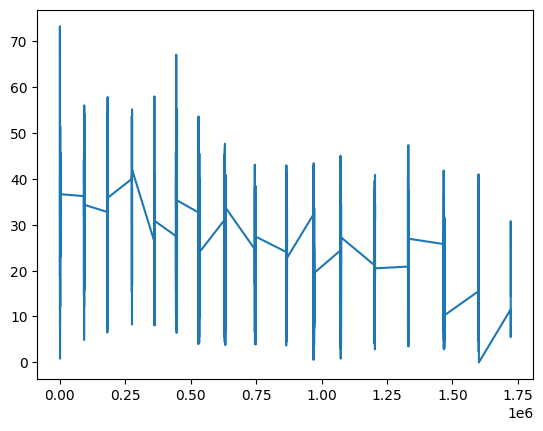

In [26]:
plt.figure
plt.plot(pollution_phoenix['NO2 Mean'], label = '')
plt.show()

Looking at the graph, it is very difficult to understand what it wants to communicate due to the fact that there is still too much data. In fact, here the phrase "too much data provides no data" clearly finds meaning. 

An interesting thing that can be done is to filter the data from Phoenix for the year 2001 and understang if all of the 365 days of 2001 have been measured.  

Dealing with the following code it can be said that the first line converts the 'Date Local' column of the pollution_phoenix DataFrame into a 'datetime' object and this operation is useful when working with time data as it allows for specific date operations. The second and the third line create 2 'datetime' objects representing the start date and the end date of the year 2001. The fourth line filters the pollution_phoenix DataFrame keeping only the rows where the local date ('Date Local') is between the start and the end date of 2001. The fifth line calculates whether there is at least one measurement for each day of 2001 and it does this by checking if the number of unique dates in the filtered DataFrame pollution_phoenix is equal to the total number of days in 2001, moreover, the '+1' is added to account for both start and end date. The sixth and the following 3 lines refer to the fifth line by printing 'All days in 2001 have at least one measurement' if the equation in line 5 has an output in 'True', while printing 'NOT all days in 2001 have measurement' if the output is 'False'. At the end is asked to print out how many days were actually measured. 

In [27]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-01-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
all_day_measure = len(pollution_phoenix['Date Local'].dt.date.unique()) == (end_date - start_date).days + 1
if all_day_measure:
    print('All days in 2001 have at least one measurement')
else: 
    print('NOT all days in 2001 have measurement')
    
print(len(pollution_phoenix['Date Local'].dt.date.unique()))

NOT all days in 2001 have measurement
359


/var/folders/nt/j3zdw65j5ys5rx0l1vhss5y40000gn/T/ipykernel_2829/3625303002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])


The output of the code is negative, so not every day has been measured in 2001 and in fact 359 days out of 365 were measured.

So let's check how many measurement are there for the NO2 Mean column in 2001. The first 4 lines are the same as above so what's new is just the the fifth line, which groups the data based on the ('Date Local') considering only the date part without the time ('.dt.date') and then takes the first value ('.first()') of the NO2 Mean column for each day in 2001 (since there are about 4 measurement for every day).  

In [28]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-01-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_NO2 = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['NO2 Mean'].first()
pollution_phoenix_NO2

/var/folders/nt/j3zdw65j5ys5rx0l1vhss5y40000gn/T/ipykernel_2829/3155308113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])


Date Local
2001-01-01    36.250000
2001-01-02    36.173913
2001-01-03    36.083333
2001-01-04    43.041667
2001-01-05    42.500000
                ...    
2001-12-27    42.916667
2001-12-28    46.652174
2001-12-29    38.875000
2001-12-30    38.875000
2001-12-31    34.363636
Name: NO2 Mean, Length: 359, dtype: float64

Since it was checked that NOT all days in 2001 have measurement, it wasn't expected to have 365 measurement and in fact the 359 measurement match what was checked previously.

Now, if it is tried again to make a very primitive plot with only the first measurement of the available days in 2001, what comes out is: 

359


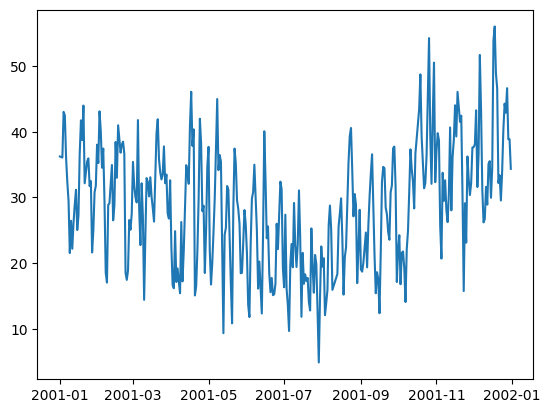

In [29]:
print(len(pollution_phoenix_NO2))
plt.figure
plt.plot(pollution_phoenix_NO2, label = '')
plt.show()

This is the trend of the NO2 pollutant for the year 2001 in the city of Phoenix. It is certainly much more explanatory than the previous one and in fact it can be seen that the last 3 months of the year had the highest levels of NO2 pollution. In fact, the presence of high Nitrogen Dioxide concentrations in winter can be attributed to several factors such as fossil fuel combustion (home heating), atmospheric stability and vehicles emissions. 

The same arguments made above will now be made for the O3 pollutant.

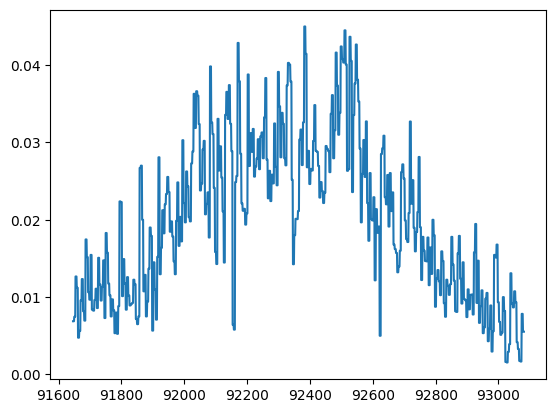

In [30]:
plt.figure
plt.plot(pollution_phoenix['O3 Mean'], label = '')
plt.show()

In [31]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-01-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_O3 = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['O3 Mean'].first()
pollution_phoenix_O3

Date Local
2001-01-01    0.006875
2001-01-02    0.007458
2001-01-03    0.012667
2001-01-04    0.011208
2001-01-05    0.004750
                ...   
2001-12-27    0.003292
2001-12-28    0.001750
2001-12-29    0.001667
2001-12-30    0.007833
2001-12-31    0.005526
Name: O3 Mean, Length: 359, dtype: float64

359


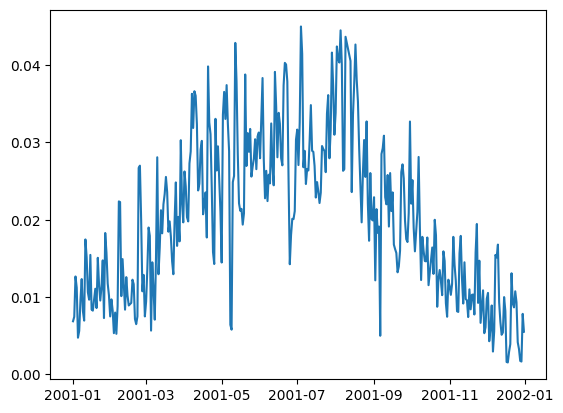

In [32]:
print(len(pollution_phoenix_O3))
plt.figure
plt.plot(pollution_phoenix_O3, label = '')
plt.show()

As might be expected, for the O3 pollutant, the highest pollution levels are in the middle months of the year that coincide with the Summer months. In fact, some factors that contribute to the accumulation of Ozone in the air are, for example, intense sunlight, high temperatures and atmospheric stability. 

Now, the same arguments made above will now be made for the SO2 pollutant.

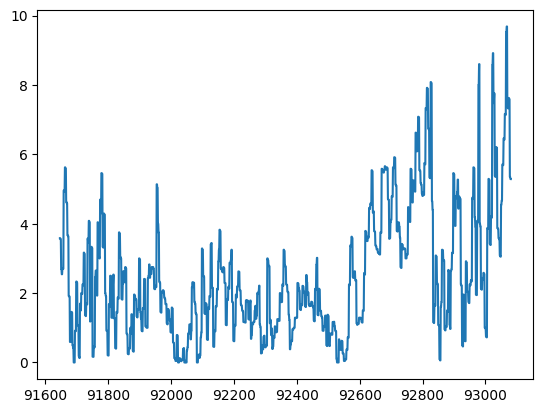

In [33]:
plt.figure
plt.plot(pollution_phoenix['SO2 Mean'], label = '')
plt.show()

In [34]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-01-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_SO2 = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['SO2 Mean'].first()
pollution_phoenix_SO2

Date Local
2001-01-01    3.583333
2001-01-02    2.695652
2001-01-03    2.708333
2001-01-04    4.958333
2001-01-05    5.625000
                ...   
2001-12-27    7.166667
2001-12-28    9.521739
2001-12-29    7.375000
2001-12-30    7.625000
2001-12-31    5.347826
Name: SO2 Mean, Length: 359, dtype: float64

359


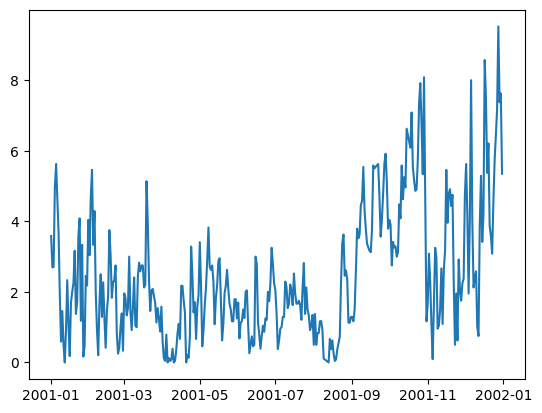

In [35]:
print(len(pollution_phoenix_SO2))
plt.figure
plt.plot(pollution_phoenix_SO2, label = '')
plt.show()

As it can be seen, the highest level of SO2 pollutant can be found during the last months of the year, corresponding to the winter months. High concentrations of Sulfur Dioxide can occur, such as for the NO2 pollutant, due to fossil fuel combustion, winter weather conditions and vehicles emissions.

In addition, the same arguments made above will now be made for the CO pollutant.

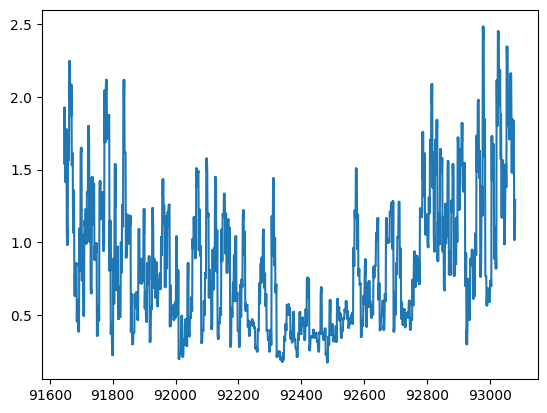

In [36]:
plt.figure
plt.plot(pollution_phoenix['CO Mean'], label = '')
plt.show()

In [37]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-01-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_CO = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['CO Mean'].first()
pollution_phoenix_CO

Date Local
2001-01-01    1.925000
2001-01-02    1.413043
2001-01-03    1.095833
2001-01-04    1.716667
2001-01-05    2.245833
                ...   
2001-12-27    1.708333
2001-12-28    2.160870
2001-12-29    1.479167
2001-12-30    1.837500
2001-12-31    1.017391
Name: CO Mean, Length: 359, dtype: float64

359


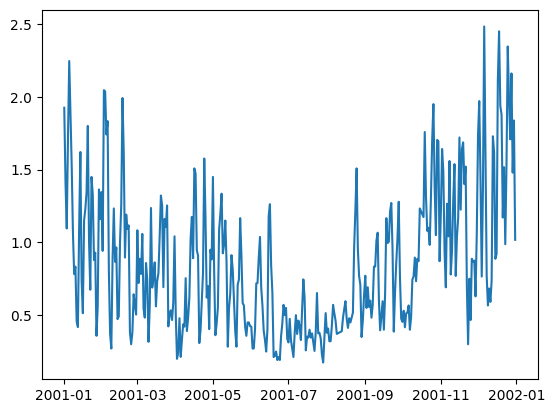

In [38]:
print(len(pollution_phoenix_CO))
plt.figure
plt.plot(pollution_phoenix_CO, label = '')
plt.show()

The same considerations done for the NO2 and the SO2 pollutants are suitable for also the carbon monoxide. In fact, high levels of CO pollutant can be found during winter months, due to fossil fuel combustion, winter weather conditions and vehicles emissions.

More details will now be gone into with graphs that consider a time period referring to the last trimester of the year 2001.

In [39]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-10-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_NO2_trimester = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['NO2 Mean'].first()
pollution_phoenix_NO2_trimester

Date Local
2001-10-01    21.916667
2001-10-02    24.260870
2001-10-03    16.791667
2001-10-04    21.583333
2001-10-05    21.782609
                ...    
2001-12-27    42.916667
2001-12-28    46.652174
2001-12-29    38.875000
2001-12-30    38.875000
2001-12-31    34.363636
Name: NO2 Mean, Length: 90, dtype: float64

In the United States, the Environmental Protection Agency (EPA) sets limits for air pollutants, including nitrogen dioxide (NO2), through the Clean Air Act. The limits are set according to the National Ambient Air Quality Standards (NAAQS), which establishes maximum allowable levels of pollutants in the air to protect public health.
For nitrogen dioxide (NO2), the NAAQS provides a primary and a secondary limit:
- Primary limit: the average daily limit for NO2 must not exceed 100 parts per billion (ppb) calculated over a one-hour period
- Secondary limit: the average annual limit of NO2 shall not exceed 53 ppb, calculated over one year

Daily average NO2 values for the last quarter of 2001 are considered in the graph below. In addition, more attention is drawn to the limit of 100 ppb which is the maximum daily limit. With the use of a boolean mask, a check was made to define whether there are values that exceed the limit and then were asked to print these values, if there are, otherwise to print 'there are no values above the treshold'. 

There are no values that exceed the treshold.


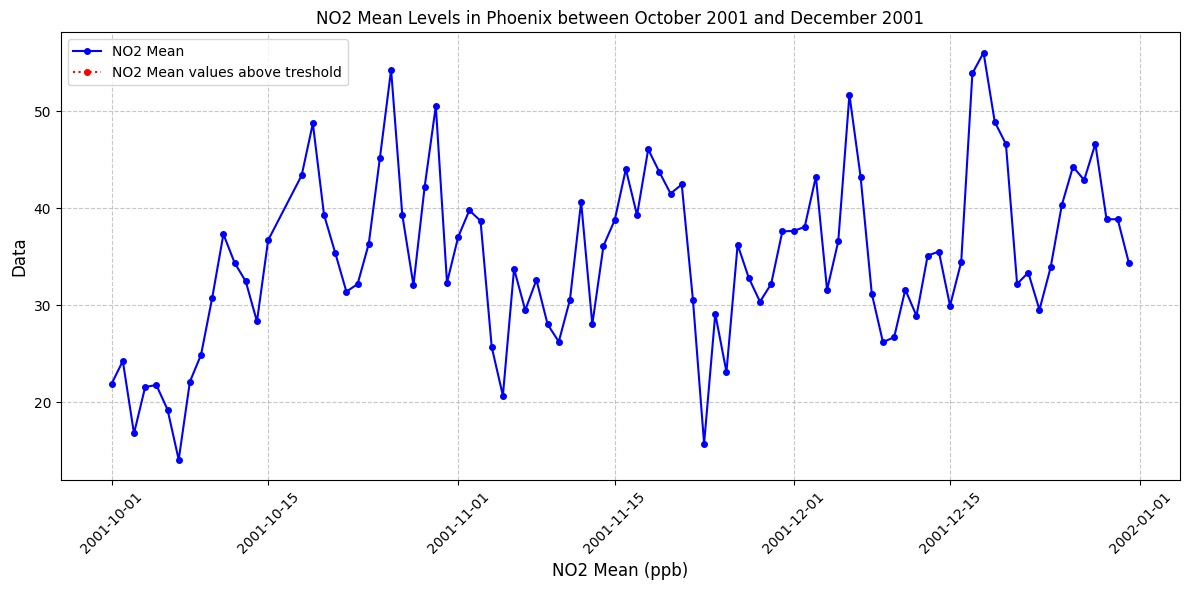

In [40]:
plt.figure(figsize = (12, 6))
plt.plot(pollution_phoenix_NO2_trimester, color = 'blue', linestyle = '-', marker = 'o', markersize = 4, label = 'NO2 Mean')
plt.title('NO2 Mean Levels in Phoenix between October 2001 and December 2001')
plt.ylabel('Data', fontsize = 12)
plt.xlabel('NO2 Mean (ppb)', fontsize = 12)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

treshold = 100
NO2_alarm = pollution_phoenix_NO2_trimester > treshold 
NO2_red_alarm = pollution_phoenix_NO2_trimester[NO2_alarm]
if len(NO2_red_alarm):
    print('The values above the treshold are:', len(NO2_red_alarm), NO2_red_alarm)
else:
    print('There are no values that exceed the treshold.')
plt.plot(NO2_red_alarm, color = 'red', linestyle = 'dotted', marker = 'o', markersize = 4, label = 'NO2 Mean values above treshold')
plt.legend()


plt.tight_layout()
plt.show()


In [41]:
pollution_phoenix_NO2_2001_mean = pollution_phoenix_NO2.mean()
pollution_phoenix_NO2_2001_mean

28.836456091922003

As mentioned above, the average limit value of NO2 in a year should not exceed 53 ppb. The average of the first measurement of day in 2001 is about 28.84 ppb, which is found to be a fairly good value. In addition, both the primary limit and the secondary limit for the selected period do not have alarming values. 

Now, the arguments done for the NO2 pollutant will be made also for the other 2 pollutants which have their maximum values in the Winter months. 

In [42]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-10-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_SO2_trimester = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['SO2 Mean'].first()
pollution_phoenix_SO2_trimester

Date Local
2001-10-01    4.041667
2001-10-02    3.913043
2001-10-03    2.750000
2001-10-04    3.416667
2001-10-05    3.260870
                ...   
2001-12-27    7.166667
2001-12-28    9.521739
2001-12-29    7.375000
2001-12-30    7.625000
2001-12-31    5.347826
Name: SO2 Mean, Length: 90, dtype: float64

Regarding sulfur dioxide (SO2), another common air pollutant, the U.S. National Ambient Air Quality Standards (NAAQS) states:
- Primary limit: the maximum daily allowable limit for sulfur dioxide (SO2) is 75 parts per billion (ppb) calculated on a 1-hour moving average.
- Secondary limit: the maximum annual allowable limit for sulfur dioxide (SO2) is 500 ppb calculated on a 3-hour moving average.

There are no values that exceed the treshold.


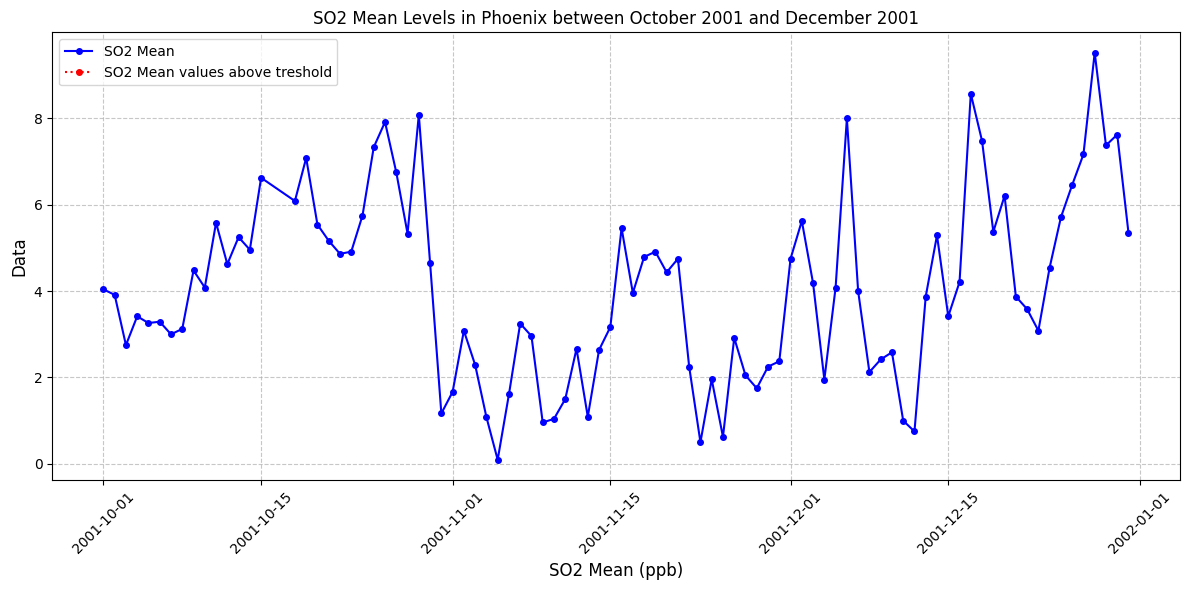

In [43]:
plt.figure(figsize = (12, 6))
plt.plot(pollution_phoenix_SO2_trimester, color = 'blue', linestyle = '-', marker = 'o', markersize = 4, label = 'SO2 Mean')
plt.title('SO2 Mean Levels in Phoenix between October 2001 and December 2001')
plt.ylabel('Data', fontsize = 12)
plt.xlabel('SO2 Mean (ppb)', fontsize = 12)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

treshold = 75
SO2_alarm = pollution_phoenix_SO2_trimester > treshold 
SO2_red_alarm = pollution_phoenix_SO2_trimester[SO2_alarm]
if len(SO2_red_alarm):
    print('The values above the treshold are:', len(SO2_red_alarm), SO2_red_alarm)
else:
    print('There are no values that exceed the treshold.')
plt.plot(SO2_red_alarm, color = 'red', linestyle = 'dotted', marker = 'o', markersize = 4, label = 'SO2 Mean values above treshold')
plt.legend()


plt.tight_layout()
plt.show()

In [44]:
pollution_phoenix_SO2_2001_mean = pollution_phoenix_SO2.mean()
pollution_phoenix_SO2_2001_mean

2.481076242339833

As stated earlier, the annual average limit for SO2 should not exceed 500 ppb. The average of the first daily measurements in 2001 is approximately 2.48 ppb, which is considered extremely satisfactory. Moreover, both the primary and secondary limits for the specified period do not show alarming values.

In [45]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-10-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_CO_trimester = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['CO Mean'].first()
pollution_phoenix_CO_trimester

Date Local
2001-10-01    0.454167
2001-10-02    0.530435
2001-10-03    0.416667
2001-10-04    0.512500
2001-10-05    0.517391
                ...   
2001-12-27    1.708333
2001-12-28    2.160870
2001-12-29    1.479167
2001-12-30    1.837500
2001-12-31    1.017391
Name: CO Mean, Length: 90, dtype: float64

Regarding carbon monoxide (CO), a common air pollutant, the U.S. National Ambient Air Quality Standards (NAAQS) states:
- Primary limit: the maximum daily allowable limit for carbon monoxide (CO) is 9 parts per million (ppm) calculated over an 8-hour moving average.
- Secondary limit: the maximum annual allowable limit for carbon monoxide (CO) is 35 ppm calculated on a 1-hour moving average.

There are no values that exceed the treshold.


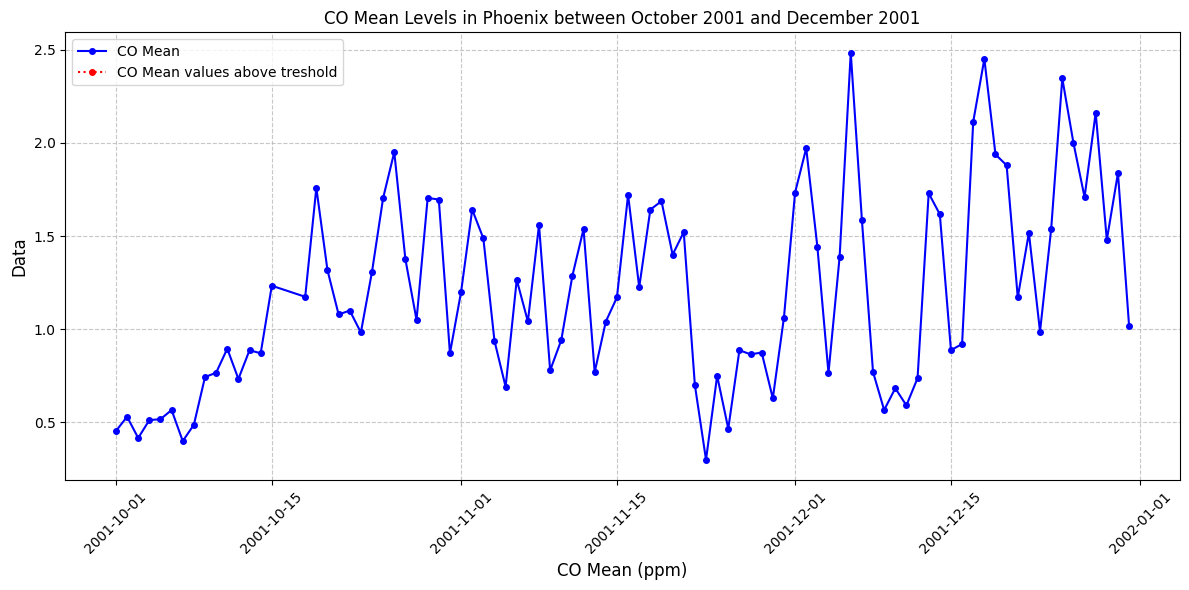

In [46]:
plt.figure(figsize = (12, 6))
plt.plot(pollution_phoenix_CO_trimester, color = 'blue', linestyle = '-', marker = 'o', markersize = 4, label = 'CO Mean')
plt.title('CO Mean Levels in Phoenix between October 2001 and December 2001')
plt.ylabel('Data', fontsize = 12)
plt.xlabel('CO Mean (ppm)', fontsize = 12)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

treshold = 75
CO_alarm = pollution_phoenix_CO_trimester > treshold 
CO_red_alarm = pollution_phoenix_CO_trimester[CO_alarm]
if len(CO_red_alarm):
    print('The values above the treshold are:', len(CO_red_alarm), CO_red_alarm)
else:
    print('There are no values that exceed the treshold.')
plt.plot(CO_red_alarm, color = 'red', linestyle = 'dotted', marker = 'o', markersize = 4, label = 'CO Mean values above treshold')
plt.legend()


plt.tight_layout()
plt.show()

In [51]:
pollution_phoenix_CO_2001_mean = pollution_phoenix_CO.mean()
pollution_phoenix_CO_2001_mean

0.8553358774373258

As previously stated, the annual average limit for CO must not surpass 35 ppm. The average of the first daily measurements in 2001 is approximately 0.86 ppm, signifying an exceptionally satisfactory level. Additionally, both the primary and secondary limits for the specified period exhibit no cause for concern. 

In this case, for the O3 pollutant, the considered months taken into account are the 'Summer months' identified as June, July and August.

In [47]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-06-01')
end_date = pd.to_datetime('2001-08-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_O3_trimester = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['O3 Mean'].first()
pollution_phoenix_O3_trimester

Series([], Name: O3 Mean, dtype: float64)

For Ozone the U.S. National Ambient Air Quality Standards (NAAQS) states:
- Primary limit: The maximum daily allowable limit for ozone (O3) is 0.070 parts per million (ppm) calculated over an 8-hour moving average
- Secondary limit: There is no specific secondary limit for ozone in outdoor air in the United States 

There are no values that exceed the treshold.


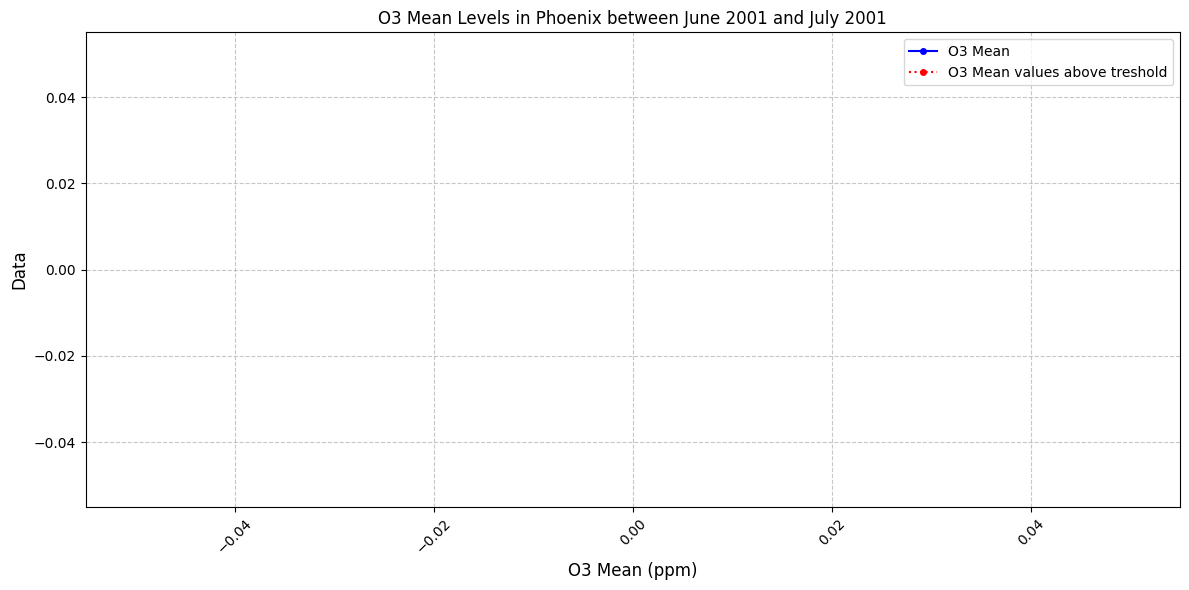

In [48]:
plt.figure(figsize = (12, 6))
plt.plot(pollution_phoenix_O3_trimester, color = 'blue', linestyle = '-', marker = 'o', markersize = 4, label = 'O3 Mean')
plt.title('O3 Mean Levels in Phoenix between June 2001 and July 2001')
plt.ylabel('Data', fontsize = 12)
plt.xlabel('O3 Mean (ppm)', fontsize = 12)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

treshold = 0.070
O3_alarm = pollution_phoenix_O3_trimester > treshold 
O3_red_alarm = pollution_phoenix_O3_trimester[O3_alarm]
if len(O3_red_alarm):
    print('The values above the treshold are:', len(O3_red_alarm), O3_red_alarm)
else:
    print('There are no values that exceed the treshold.')
plt.plot(O3_red_alarm, color = 'red', linestyle = 'dotted', marker = 'o', markersize = 4, label = 'O3 Mean values above treshold')
plt.legend()


plt.tight_layout()
plt.show()

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()
x_train = pollution_phoenix['CO Mean'].to_numpy().reshape(-1, 1)
y_train = pollution_phoenix['NO2 Mean'].to_numpy().reshape(-1, 1)
print(x_train.shape, y_train.shape)
model.fit(x_train, y_train)

(0, 1) (0, 1)


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [ ]:
pollution_phoenix['SO2 Mean'].corr(pollution_phoenix['CO Mean'])

In [ ]:
pollution_phoenix['SO2 Mean'].corr(pollution_phoenix['O3 Mean'])

In [ ]:
pollution_phoenix_NO2.corr(pollution_phoenix_SO2) 

In [ ]:
pollution_phoenix_NO2.corr(pollution_phoenix_O3)

In [ ]:
pollution_phoenix_CO.corr(pollution_phoenix_NO2)

In [ ]:
pollution_phoenix_CO.corr(pollution_phoenix_O3)

In [ ]:
pollution_phoenix_CO.corr(pollution_phoenix_SO2)

In [ ]:
pollution_phoenix_SO2.corr(pollution_phoenix_O3)